# Step 1: Install and import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2: Upload and load the dataset

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 3: Basic dataset information


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Step 4: Drop 'CustomerID' and encode 'Gender'

In [6]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features for clustering
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Use Elbow Method to find optimal K

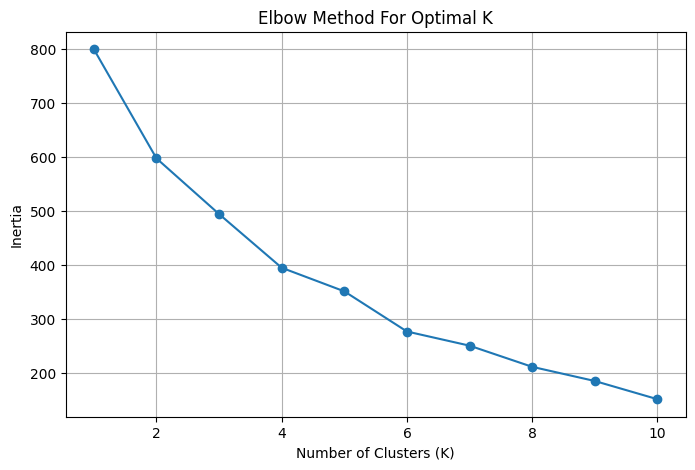

In [7]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

#Step 6: Apply KMeans with Optimal K (e.g., K=5)

In [9]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster column to original DataFrame
df['Cluster'] = cluster_labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,4
4,1,31,17,40,4


# Step 7: PCA for 2D Visualization

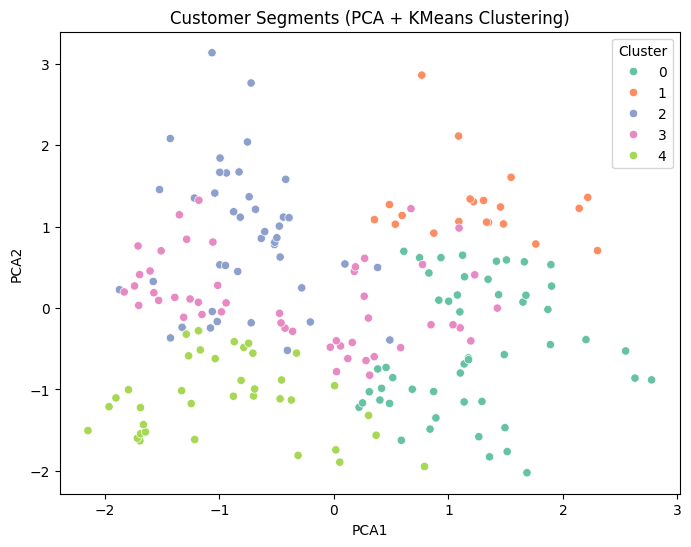

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segments (PCA + KMeans Clustering)")
plt.show()


#Step 8: Evaluate with Silhouette Score

In [11]:
score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score for K =", optimal_k, "is", round(score, 3))


Silhouette Score for K = 5 is 0.272
